# Final Assignment

Author: Liam Hoogstad  
CID: 01956599  
Date: 13 November 2025

## 1. Importing Libraries

In [72]:
# Loading required libraries
#| warning: false
# install.packages(c("dplyr", "ggplot2", "PerformanceAnalytics", "xts"))
# install.packages(c("glue"))
# install.packages(c("lubridate"))
library(dplyr)
library(ggplot2)
library(PerformanceAnalytics)
library(lubridate)
library(glue)
library(xts)

## 2. Data Cleaning

First, I need to select the rows from the csv file containing Pfizer's information.  
I'm going to do this by selecting the rows with tic == 'PFE'  
I'm also going to convert dates to the date type.

In [73]:
# Read the CSV file
compustat_data <- read.csv("compustat_daily_2010_2025.csv")

# Filter for PFE ticker
pfe_data <- compustat_data %>%
  filter(tic == "PFE") %>%
  # removing unnecessary columns
  select(-add1, -addzip, -busdesc, -city, -conml, -fax, -loc, -phone, -weburl) %>%
  # convert datadate to Date type
  mutate(datadate = mdy(datadate))

head(pfe_data, n = 10) # first 10 rows

# saving filtered data to a new csv file
write.csv(pfe_data, "pfe_data.csv", row.names = FALSE)

,tic,datadate,conm,exchg,sic,cshtrd,prccd,prchd,prcld,prcod,gvkey
,<chr>,<date>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,PFE,2010-01-04,PFIZER INC,11,2834,52074710,18.93,18.94,18.235,18.27,8530
2,PFE,2010-01-05,PFIZER INC,11,2834,43368460,18.66,18.93,18.550,18.92,8530
3,PFE,2010-01-06,PFIZER INC,11,2834,41405070,18.60,18.81,18.510,18.66,8530
4,PFE,2010-01-07,PFIZER INC,11,2834,39427720,18.53,18.67,18.460,18.64,8530
5,PFE,2010-01-08,PFIZER INC,11,2834,30403370,18.68,18.71,18.520,18.62,8530
6,PFE,2010-01-11,PFIZER INC,11,2834,32442710,18.83,18.95,18.670,18.83,8530
7,PFE,2010-01-12,PFIZER INC,11,2834,41270900,18.77,18.99,18.640,18.80,8530
8,PFE,2010-01-13,PFIZER INC,11,2834,59506750,19.21,19.30,18.870,18.87,8530
9,PFE,2010-01-14,PFIZER INC,11,2834,47258330,19.38,19.50,19.130,19.20,8530


## 3. Autocorrelation of simple daily returns

In order to compute the autocorrelation, I first need to create a column containing simple daily returns. Then, once I have that I can find autocorrelation.

So, first I am going to add a simple daily return column, which will be based on closing prices:

In [74]:
# Loading Pfizer Data:
pfe_data <- read.csv("pfe_data.csv")

# Calculating simple daily returns based on closing prices (prccd)
pfe_data <- pfe_data %>%
  mutate(daily_return = (prccd / lag(prccd) - 1) * 100) %>% # Returns as percentage 
  filter(!is.na(daily_return))  # remove NA rows

head(pfe_data) # view first 6 rows

,tic,datadate,conm,exchg,sic,cshtrd,prccd,prchd,prcld,prcod,gvkey,daily_return
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,PFE,2010-01-05,PFIZER INC,11,2834,43368460,18.66,18.93,18.55,18.92,8530,-1.4263074
2,PFE,2010-01-06,PFIZER INC,11,2834,41405070,18.60,18.81,18.51,18.66,8530,-0.3215434
3,PFE,2010-01-07,PFIZER INC,11,2834,39427720,18.53,18.67,18.46,18.64,8530,-0.3763441
4,PFE,2010-01-08,PFIZER INC,11,2834,30403370,18.68,18.71,18.52,18.62,8530,0.8094981
5,PFE,2010-01-11,PFIZER INC,11,2834,32442710,18.83,18.95,18.67,18.83,8530,0.8029979
6,PFE,2010-01-12,PFIZER INC,11,2834,41270900,18.77,18.99,18.64,18.80,8530,-0.3186405


Now that I have a column with simple daily returns, I can plot the autocorrelation of those returns:

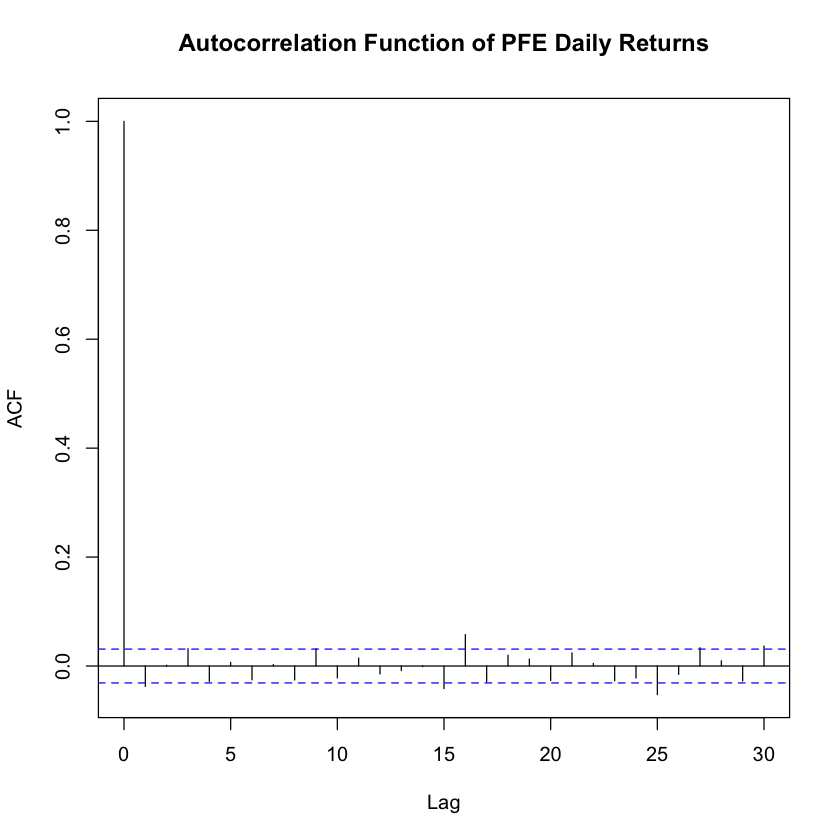

In [75]:
# Plotting acf of simple daily returns
acf(pfe_data$daily_return, 
    main = "Autocorrelation Function of PFE Daily Returns",
    lag.max = 30)

## 4. Simple Moving Average Trading Strategy



### Finding Subset: 2020 Onwards

In preparation for the Moving Average Crossover Strategy, I need to find the subset of the data from the begining of 2020 onwards.


In [76]:
# New dataframe with data from 2020-01-01 onwards
pfe_2020_plus <- pfe_data %>%
  filter(datadate >= as.Date("2020-01-01"))

head(pfe_2020_plus)

,tic,datadate,conm,exchg,sic,cshtrd,prccd,prchd,prcld,prcod,gvkey,daily_return
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,PFE,2020-01-02,PFIZER INC,11,2834,15667930,39.14,39.35,38.875,39.30,8530,-0.1020929
2,PFE,2020-01-03,PFIZER INC,11,2834,14158250,38.93,39.24,38.670,38.72,8530,-0.5365355
3,PFE,2020-01-06,PFIZER INC,11,2834,13547080,38.88,39.00,38.700,38.82,8530,-0.1284357
4,PFE,2020-01-07,PFIZER INC,11,2834,19083070,38.75,39.13,38.680,39.12,8530,-0.3343621
5,PFE,2020-01-08,PFIZER INC,11,2834,15563050,39.06,39.22,38.750,38.76,8530,0.8000000
6,PFE,2020-01-09,PFIZER INC,11,2834,20846030,38.89,39.27,38.790,39.27,8530,-0.4352279


I have created the trading strategy functions in my file 'trading_strategies.R'.  
Here, I am going to use them, and plot the performance of my trading strategies.  

    - My fast moving average uses a 30 day window  
    - My slow moving average uses a 150 day window

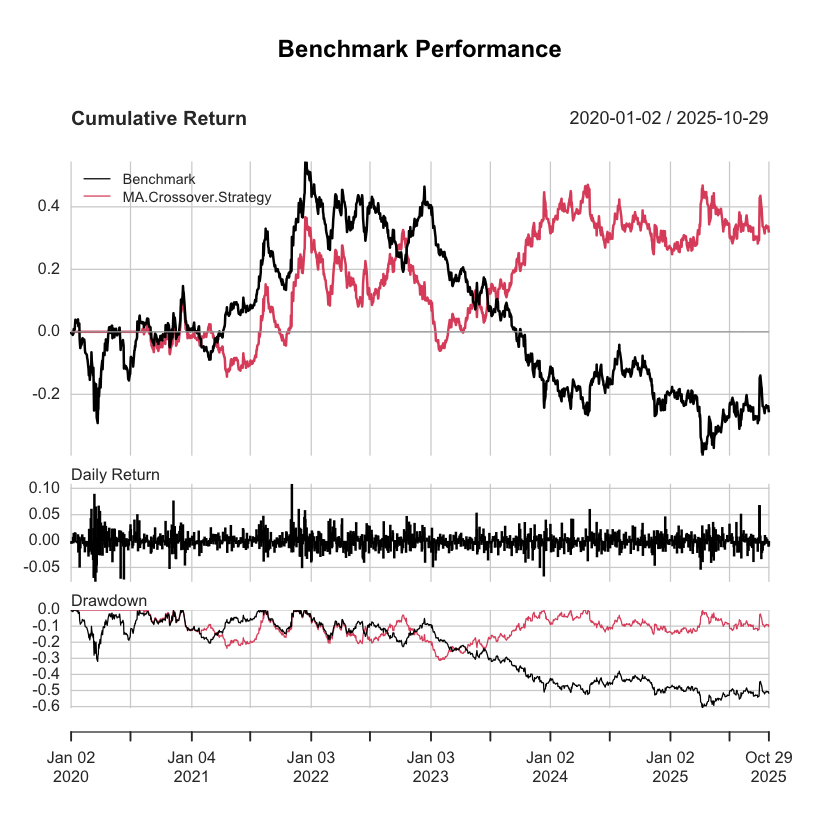

In [77]:
# Convert to xts
pfe_2020_plus$datadate <- as.Date(pfe_2020_plus$datadate) # Convert to date for xts
pfe_xts <- xts(pfe_2020_plus$prccd, order.by = pfe_2020_plus$datadate)

# fast MA (30 days)
fast_ma <- pfe_xts * NA
for (i in 30:length(pfe_xts)) {
    fast_ma[i] <- sum(pfe_xts[(i - 30 + 1):i]) / 30
}

# slow MA (150 Days)
slow_ma <- pfe_xts * NA
for (i in 150:length(pfe_xts)) {
  slow_ma[i] <- sum(pfe_xts[(i - 150 + 1):i]) / 150
}

signal <- sign(fast_ma - slow_ma) # generate signal

# Backtest
returns <- pfe_xts / stats::lag(pfe_xts) - 1
strategyReturns <- stats::lag(signal) * returns
returns[is.na(returns)] <- 0
strategyReturns[is.na(strategyReturns)] <- 0

# Plot performance
names(returns) <- "Benchmark"
names(strategyReturns) <- "MA Crossover Strategy"
benchmarkStrategyReturns <- cbind(returns, strategyReturns)
charts.PerformanceSummary(benchmarkStrategyReturns, geometric = FALSE)



## 5. Bolinger Bands Breakout Strategy

### AI Declaration
For the following section, I acknowledge the use of Claude—Sonnet—4.5 (Anthropic, https://claude.ai/) to assists me with the completion of the following two sections relating to the Bollinger Bands Breakout Strategy, and using the Bollinger Bands Breakout Strategy function to genereate signals for Pfizer close prices. I confirm that no content generated by AI has been presented as my own work.

In [78]:
# I acknowledge the code in this code cell was generated with the assistance of AI (Claude—Sonnet—4.5)

#' Generate Buy/Sell Signals Based on Bollinger Bands Breakout
#'
#' @param prices Numeric vector of closing prices
#' @param n Integer, number of periods for moving average (default: 20)
#' @param sd_mult Numeric, number of standard deviations for bands (default: 2)
#' @return Numeric vector of signals: +1 (buy), -1 (sell), 0 (no position), NA (insufficient data)
#' @description Generates trading signals where:
#'   - Signal = +1 when price breaks above upper Bollinger Band (bullish breakout)
#'   - Signal = -1 when price breaks below lower Bollinger Band (bearish breakout)
#'   - Signal = 0 when price is within bands (no position)

generate_bollinger_signals <- function(prices, n = 20, sd_mult = 2) {
  
  # Initialize vectors
  length_prices <- length(prices)
  middle_band <- rep(NA, length_prices)
  upper_band <- rep(NA, length_prices)
  lower_band <- rep(NA, length_prices)
  
  # Calculate Bollinger Bands
  for (i in n:length_prices) {
    # Middle band = Simple Moving Average
    middle_band[i] <- mean(prices[(i - n + 1):i])
    
    # Calculate standard deviation
    std_dev <- sd(prices[(i - n + 1):i])
    
    # Upper band = SMA + (SD multiplier × standard deviation)
    upper_band[i] <- middle_band[i] + (sd_mult * std_dev)
    
    # Lower band = SMA - (SD multiplier × standard deviation)
    lower_band[i] <- middle_band[i] - (sd_mult * std_dev)
  }
  
  # Generate signals based on breakouts
  signal <- rep(0, length_prices)
  
  for (i in n:length_prices) {
    if (!is.na(upper_band[i]) && !is.na(lower_band[i])) {
      # Buy signal: price closes above upper band
      if (prices[i] > upper_band[i]) {
        signal[i] <- 1
      }
      # Sell signal: price closes below lower band
      else if (prices[i] < lower_band[i]) {
        signal[i] <- -1
      }
      # No position: price within bands
      else {
        signal[i] <- 0
      }
    } else {
      signal[i] <- NA
    }
  }
  
  return(signal)
}

anti_bollinger_signals <- function(prices, n = 20, sd_mult = 2) {
  
  # Initialize vectors
  length_prices <- length(prices)
  middle_band <- rep(NA, length_prices)
  upper_band <- rep(NA, length_prices)
  lower_band <- rep(NA, length_prices)
  
  # Calculate Bollinger Bands
  for (i in n:length_prices) {
    # Middle band = Simple Moving Average
    middle_band[i] <- mean(prices[(i - n + 1):i])
    
    # Calculate standard deviation
    std_dev <- sd(prices[(i - n + 1):i])
    
    # Upper band = SMA + (SD multiplier × standard deviation)
    upper_band[i] <- middle_band[i] + (sd_mult * std_dev)
    
    # Lower band = SMA - (SD multiplier × standard deviation)
    lower_band[i] <- middle_band[i] - (sd_mult * std_dev)
  }
  
  # Generate signals based on breakouts
  signal <- rep(0, length_prices)
  
  for (i in n:length_prices) {
    if (!is.na(upper_band[i]) && !is.na(lower_band[i])) {
      # Buy signal: price closes above upper band
      if (prices[i] > upper_band[i]) {
        signal[i] <- -1
      }
      # Sell signal: price closes below lower band
      else if (prices[i] < lower_band[i]) {
        signal[i] <- 1
      }
      # No position: price within bands
      else {
        signal[i] <- 0
      }
    } else {
      signal[i] <- NA
    }
  }
  
  return(signal)
}

### Bollinger Bands Breakout Strategy Explanation/Interpretation

This strategy trades when a stock's price is significantly higher or lower than the moving average for a specific window (which is typically around 20 days). 

The strategy works as follows:

- generate the 20 day moving average
- generate the standard deviation for the prices of the last 20 days
- when the price goes more than 2 st devs above the 20 day moving avg, generate a buy signal
- when the price goes more than 2 st devs below the 20 day moving avg, generate a sell signal

The main idea is that if stocks goes significantly up or down, there must be some kind of momentum effect happening, which could be an indicator that there is a reason to buy the stock, and vice versa if the price goes significantly down.

This goes against the idea of mean regression, however, which makes me doubt the effectiveness of this strategy.

Now that the Bollinger Bands Breakout Strategy function has been generated, I will backtest the strategy and compare its performance to the Moving Average and Benchmark Strategy:

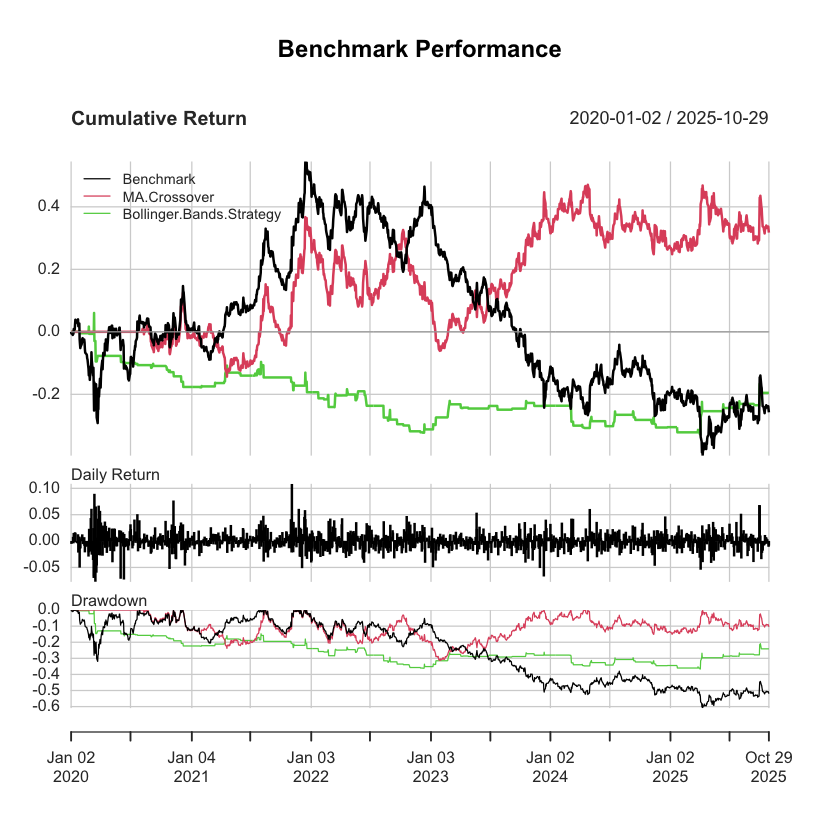

In [81]:
pfe_2020_plus$datadate <- as.Date(pfe_2020_plus$datadate)

# convert to xts
pfe_xts <- xts(pfe_2020_plus$prccd, order.by = pfe_2020_plus$datadate)

# generate bollinger signals
bb_signal <- generate_bollinger_signals(pfe_2020_plus$prccd, n = 20, sd_mult = 2)

# convert signals to xts format
bb_signal_xts <- xts(bb_signal, order.by = pfe_2020_plus$datadate)

# Backtest the strategy
returns <- pfe_xts / stats::lag(pfe_xts) - 1
bb_strategyReturns <- stats::lag(bb_signal_xts) * returns

# Replace NA with 0
returns[is.na(returns)] <- 0
bb_strategyReturns[is.na(bb_strategyReturns)] <- 0

# Plot performance
names(returns) <- "Benchmark"
names(strategyReturns) <- "MA Crossover"
names(bb_strategyReturns) <- "Bollinger Bands Strategy"
bb_vs_ma_vs_benchmark <- cbind(returns, strategyReturns, bb_strategyReturns)
charts.PerformanceSummary(bb_vs_ma_vs_benchmark, geometric = FALSE)

Modification

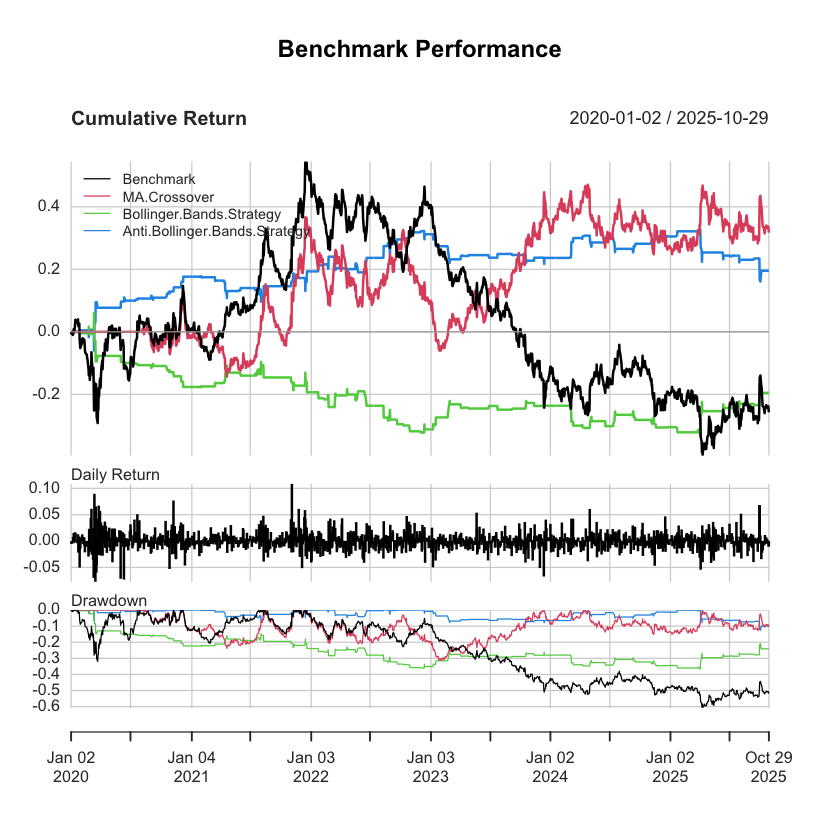

In [ ]:
# generate bollinger signals
anti_bb_signal <- anti_bollinger_signals(pfe_2020_plus$prccd, n = 20, sd_mult = 2)

# convert signals to xts format
anti_bb_signal_xts <- xts(anti_bb_signal, order.by = pfe_2020_plus$datadate)

# Backtest the strategy
anti_bb_strategyReturns <- stats::lag(anti_bb_signal_xts) * returns

anti_bb_strategyReturns[is.na(bb_strategyReturns)] <- 0

# Plot performance
names(anti_bb_strategyReturns) <- "Anti Bollinger Bands Strategy"
all_strategies <- cbind(returns, strategyReturns, bb_strategyReturns, anti_bb_strategyReturns)
charts.PerformanceSummary(all_strategies, geometric = FALSE)